In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Dataset"

India_Crimes_2001_to_2004.csv  India_Crimes_2012_to_2017.csv
India_Crimes_2005_to_2007.csv  India_Crimes_2018_to_2022.csv
India_Crimes_2008_to_2011.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries

#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2001_to_2004.csv",error_bad_lines=False)
data2 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2005_to_2007.csv",error_bad_lines=False)
data3 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2008_to_2011.csv",error_bad_lines=False)
data4 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2012_to_2017.csv",error_bad_lines=False)
data5 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2018_to_2022.csv",error_bad_lines=False)

<ipython-input-10-1098c0eb26e5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2001_to_2004.csv",error_bad_lines=False)
b'Skipping line 1513591: expected 23 fields, saw 24\n'
<ipython-input-10-1098c0eb26e5>:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2001_to_2004.csv",error_bad_lines=False)
<ipython-input-10-1098c0eb26e5>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv("/content/drive/MyDrive/Dataset/India_Crimes_2005_to_2007.csv",error_bad_lines=False)
b'Skipping line 533719: expected 23 fields, saw 24\n'
<ipython-input-10-1098c0eb26e5>:3: FutureWarning: The error_bad_lines argument h

In [ ]:
df = pd.concat([data1,data2,data3,data4,data5])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9899337 entries, 0 to 1958054
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
 23  Unnamed

In [ ]:
df.shape

(9899337, 24)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
ID                            0
Case Number                   9
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description       2809
Arrest                        0
Domestic                      0
Beat                          0
District                    131
Ward                    1195281
Community Area          1197622
FBI Code                      0
X Coordinate             144587
Y Coordinate             144587
Year                          0
Updated On                    0
Latitude                 144587
Longitude                144588
Location                 144588
Unnamed: 0.1            7941282
dtype: int64

In [ ]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df=df.dropna()

In [ ]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=100000)

In [ ]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1320807 to 1080855
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  object

In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Year,Latitude,Longitude,Location,Unnamed: 0.1,Month,Day,Hour,Minute,Second
1320807,003XX W SCHILLER ST,0810,THEFT,OVER $500,STREET,False,False,1821,18.0,27.0,...,2008,41.907612,-87.637901,"(41.907611816, -87.637901228)",1459273.0,9,13,15,0,0
639069,022XX N CENTRAL PARK AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1413,14.0,26.0,...,2006,41.922155,-87.716918,"(41.922154804, -87.716917822)",724646.0,9,6,8,0,0
1453322,093XX S PHILLIPS AVE,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,False,False,423,4.0,7.0,...,2009,41.725435,-87.564457,"(41.725434534, -87.564457404)",1591788.0,1,16,11,45,0
772963,102XX S STATE ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,511,5.0,9.0,...,2006,41.708756,-87.623554,"(41.70875608, -87.623553531)",858540.0,9,30,13,11,28
959371,066XX S VERNON AVE,0810,THEFT,OVER $500,STREET,False,False,312,3.0,20.0,...,2007,41.774353,-87.614285,"(41.774353267, -87.614285206)",1044948.0,5,28,19,0,0


In [ ]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


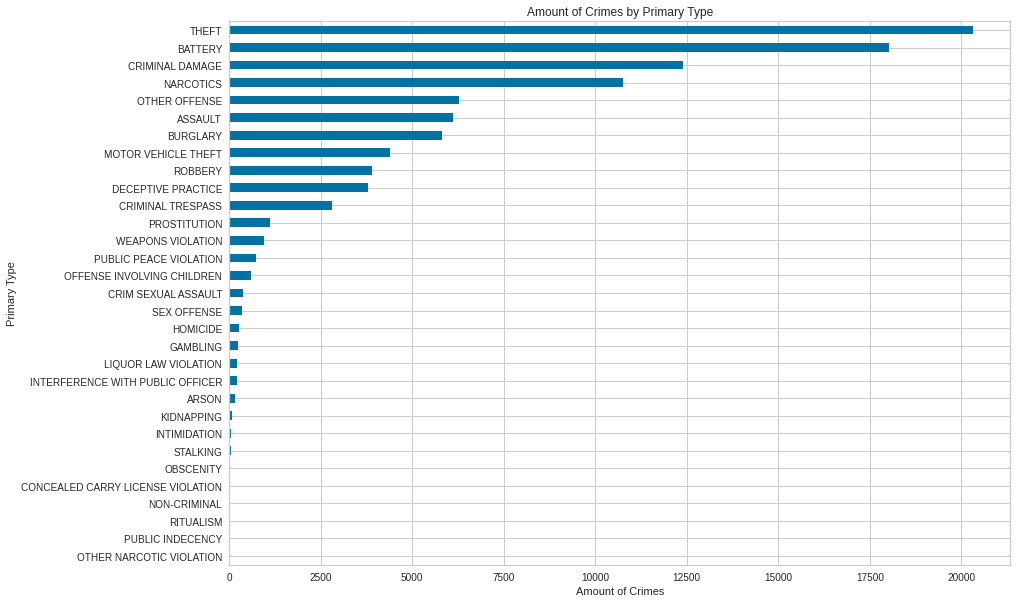

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
9,GAMBLING,249
14,LIQUOR LAW VIOLATION,213
11,INTERFERENCE WITH PUBLIC OFFICER,203
0,ARSON,165
13,KIDNAPPING,70
12,INTIMIDATION,53
28,STALKING,48
18,OBSCENITY,6
4,CONCEALED CARRY LICENSE VIOLATION,3
17,NON-CRIMINAL,2


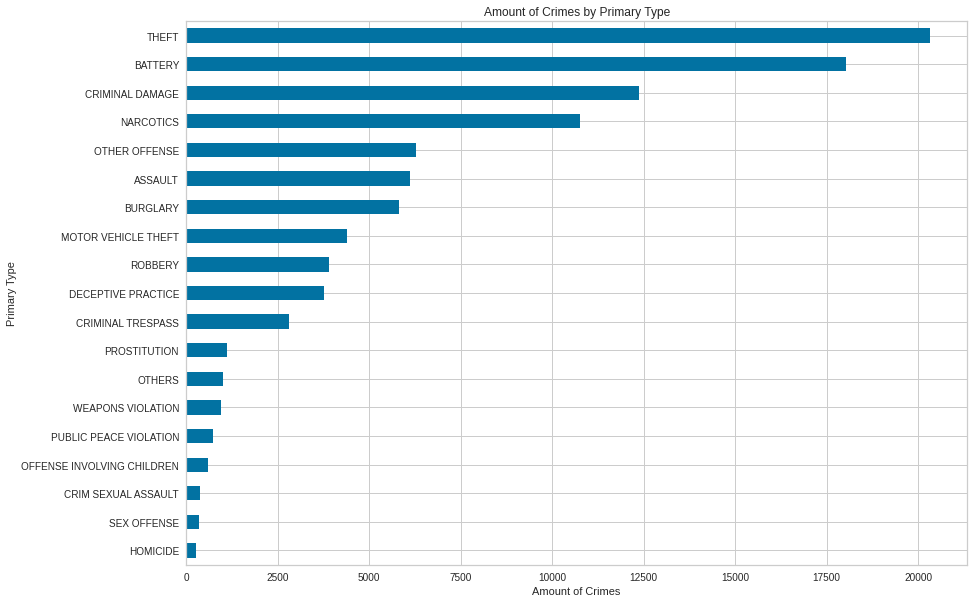

In [ ]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'BURGLARY', 'ASSAULT', 'NARCOTICS', 'ROBBERY',
       'OTHER OFFENSE', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'CRIMINAL DAMAGE', 'BATTERY', 'WEAPONS VIOLATION', 'PROSTITUTION',
       'DECEPTIVE PRACTICE', 'OTHERS', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'HOMICIDE'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0]
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

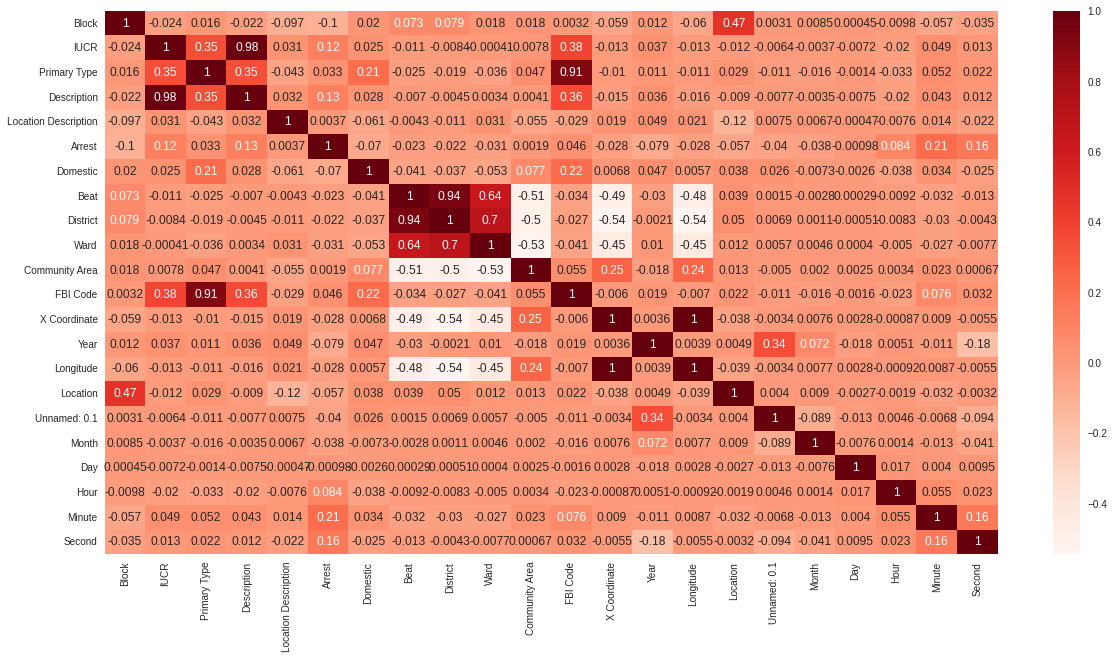

In [ ]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3><b>Further Elaboration of Correlation</b></h3>

The correlation coefficient has values between -1 to 1

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.345079
Primary Type    1.000000
Description     0.346205
Domestic        0.214293
FBI Code        0.911941
Name: Primary Type, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code","Domestic"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code', 'Domestic']


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code', 'Domestic']
Target Class        :  Primary Type
Training Set Size   :  (80000, 24)
Test Set Size       :  (20000, 24)


### Machine Learning Modelling

<h1> 1) Random Forest Classifier </h1>

In [ ]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m) 

========== Random Forest Results ==========
Accuracy    :  0.99605
Recall      :  0.99605
Precision   :  0.996136359081913
F1 Score    :  0.99605
Confusion Matrix: 
[[4006    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 1120    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 1204    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 2112    0    0    0    0    0    0    0    0    0    0
     0   12    0    0    0]
 [   0    0    0    0  769    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1252    0    0    0    0    0    0    0    1
     0    3    2    0    0]
 [   0    0    0    0    0    2  563    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0  828    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

                     THEFT       1.00      1.00      1.00      4006
                  BURGLARY       1.00      1.00      1.00      1120
                   ASSAULT       1.00      1.00      1.00      1204
                 NARCOTICS       1.00      0.99      1.00      2124
                   ROBBERY       1.00      1.00      1.00       769
             OTHER OFFENSE       0.98      1.00      0.99      1258
         CRIMINAL TRESPASS       1.00      1.00      1.00       565
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       828
           CRIMINAL DAMAGE       1.00      1.00      1.00      2643
                   BATTERY       1.00      1.00      1.00      3653
         WEAPONS VIOLATION       0.99      1.00      0.99       172
              PROSTITUTION       1.00      1.00      1.00       242
        DECEPTIVE PRACTICE       0.99      1.00      1.0

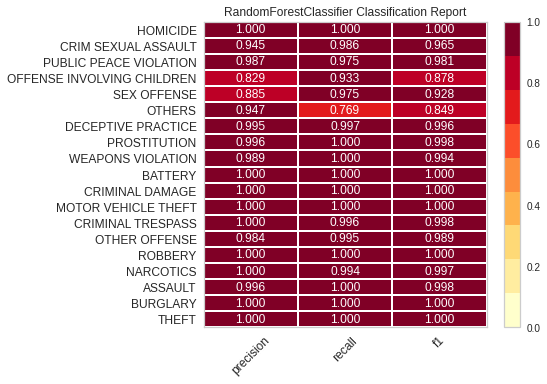

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

<h1>2) MLP Neural Network</h1>

In [ ]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.96925
Recall      :  0.96925
Precision   :  0.9750555406225241
F1 Score    :  0.96925
Confusion Matrix: 
[[4006    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 1120    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 1204    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 2112    0   12    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    3  766    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1255    0    0    0    0    0    0    0    3
     0    0    0    0    0]
 [   0    0    0    0    0  203  362    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0  827    0    0    0    0    0    1
     0    0    0    0    0]
 [   0    0    0    0    0    0  

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

                     THEFT       1.00      1.00      1.00      4006
                  BURGLARY       1.00      1.00      1.00      1120
                   ASSAULT       1.00      1.00      1.00      1204
                 NARCOTICS       1.00      0.99      1.00      2124
                   ROBBERY       1.00      1.00      1.00       769
             OTHER OFFENSE       0.81      1.00      0.90      1258
         CRIMINAL TRESPASS       1.00      0.64      0.78       565
       MOTOR VEHICLE THEFT       0.99      1.00      1.00       828
           CRIMINAL DAMAGE       1.00      1.00      1.00      2643
                   BATTERY       1.00      0.98      0.99      3653
         WEAPONS VIOLATION       0.92      0.93      0.93       172
              PROSTITUTION       0.96      0.97      0.97       242
        DECEPTIVE PRACTICE       0.91      0.92      0.9

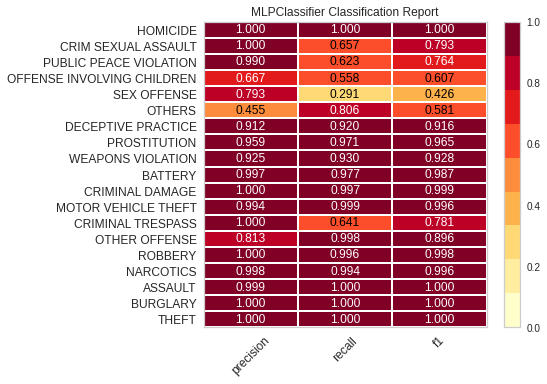

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

<h1>3) KNN</h1>

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99915
Recall      :  0.99915
Precision   :  0.9991535012958273
F1 Score    :  0.99915
Confusion Matrix: 
[[4006    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 1120    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 1204    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 2123    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0]
 [   0    0    0    0  769    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1255    0    0    0    0    2    0    0    1
     0    0    0    0    0]
 [   0    0    0    0    0    0  565    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0  828    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0  

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

                     THEFT       1.00      1.00      1.00      4006
                  BURGLARY       1.00      1.00      1.00      1120
                   ASSAULT       1.00      1.00      1.00      1204
                 NARCOTICS       1.00      1.00      1.00      2124
                   ROBBERY       1.00      1.00      1.00       769
             OTHER OFFENSE       1.00      1.00      1.00      1258
         CRIMINAL TRESPASS       1.00      1.00      1.00       565
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       828
           CRIMINAL DAMAGE       1.00      1.00      1.00      2643
                   BATTERY       1.00      1.00      1.00      3653
         WEAPONS VIOLATION       0.98      0.99      0.99       172
              PROSTITUTION       1.00      1.00      1.00       242
        DECEPTIVE PRACTICE       1.00      1.00      1.0

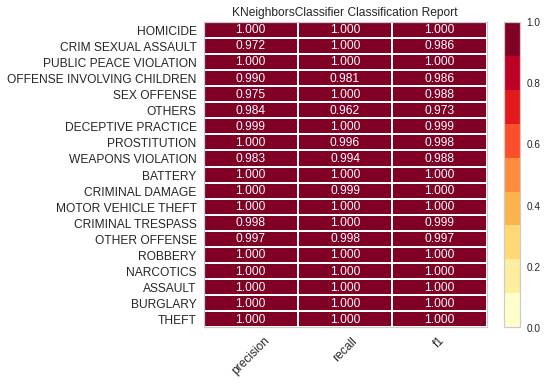

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

<h1> 4) Ensemble Learning [KNN, Random Forest Classifier, Neural Model]</h1>

In [ ]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.9978
Recall      :  0.9978
Precision   :  0.9977738458847827
F1 Score    :  0.9978
Confusion Matrix: 
[[4006    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 1120    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 1204    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 2124    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  769    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1256    0    0    0    0    0    0    0    2
     0    0    0    0    0]
 [   0    0    0    0    0    2  563    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0  828    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0   

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

                     THEFT       1.00      1.00      1.00      4006
                  BURGLARY       1.00      1.00      1.00      1120
                   ASSAULT       1.00      1.00      1.00      1204
                 NARCOTICS       1.00      1.00      1.00      2124
                   ROBBERY       1.00      1.00      1.00       769
             OTHER OFFENSE       0.98      1.00      0.99      1258
         CRIMINAL TRESPASS       1.00      1.00      1.00       565
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       828
           CRIMINAL DAMAGE       1.00      1.00      1.00      2643
                   BATTERY       1.00      1.00      1.00      3653
         WEAPONS VIOLATION       0.99      1.00      1.00       172
              PROSTITUTION       1.00      1.00      1.00       242
        DECEPTIVE PRACTICE       1.00      1.00      1.0

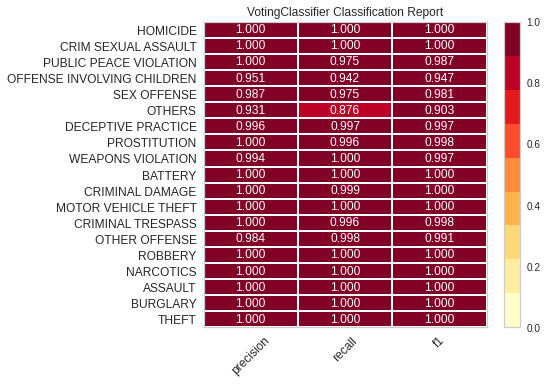

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data